In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split
from scipy import stats

In [44]:
df1=pd.read_csv('Muestras/PruebaAgena.csv')

cambios=df1[df1['Tiempo']=='Order'].index.tolist()

contador = 0
x= []
y=[]
for i in cambios:
    gesto1=df1[(df1.index>=i-300)&(df1.index<i)].astype(int)
    gesto1 = gesto1.to_numpy()

#     m=np.fft.rfft(gesto1[:,2:8],axis=0)
#     f=30
#     ones=np.ones(f)
#     zeros=np.zeros(m.shape[0]-f)
#     c=np.concatenate((ones,zeros))
#     clean=m*c.reshape(m.shape[0],1)
#     m=np.fft.irfft(clean,axis=0)
#     x.append(m)

    x.append(gesto1[:,2:8])

y=[1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0]
yd = [1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0]
x = np.array(x)
y = np.array(y)
x = (x+32762)/65536
print(x.shape)

(60, 300, 6)


In [ ]:
#se convierte el archivo csv de las muestras para crear el conjunto de muestras de test
#y es el orden de las muestras en el archivo csv

In [4]:
allModels = []
bestModels = []
contador = 0
modelosG = [1,4,8,11,12,13,14,15,16,17,18,19,20,21,22,23]
modelosE = [11,12,13,15,19,21]
for i in [10,100]:
    for j in [10,50,100]:
        for k in [5,10,20,30]:
            if contador in modelosG:
                modelo = tf.keras.models.load_model('./modelos/modelo_bs'+str(i)+'_sf'+str(j)+'_nf'+str(k)+'.h5')
                bestModels.append(modelo)
#             if contador in modelosG:
#                 modelo = tf.keras.models.load_model('./modelos/mejores6/modelo_bs'+str(i)+'_sf'+str(j)+'_nf'+str(k)+'.h5')
#                 allModels.append(modelo)
            
            contador+=1

In [13]:
# se cargan los modelos cullas curvas de aprendisaje se vieran buenas (modelosG) estos modelos mostraron indecicionn en
# una muestra especifica, se decidio solo tomar los modelos que no respondieron bien a esa muestra y se crea el grupo modelosE

In [6]:
allPredicts = []
bestPredicts = []
for i in bestModels:
    preds = i.predict(x).argmax(axis=1)
    bestPredicts.append(preds)
for i in allModels:
    preds = i.predict(x).argmax(axis=1)
    allPredicts.append(preds)   
    
allPredicts = np.array(allPredicts)
bestPredicts = np.array(bestPredicts)

finalPreds = stats.mode(bestPredicts,axis=0)

In [20]:
allPredicts[:,58]

IndexError: too many indices for array

In [ ]:
#aqui se puede ver que todos los modelos tienen respuestas muy diferentes ante la misma muestra que es un 3(X)
#de aqui se toman los modelos que efectivamente dieron 3 como resultado ([11,12,13,15,19,21])

In [21]:
bestPredicts[:,40:60]

array([[1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2],
       [0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 0, 0, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 0, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 0, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 3, 3, 3, 3,

In [10]:
print(finalPreds[0][0][40:60])
print(finalPreds[1][0][40:60])

[1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 0 0 0 0 1]
[15 15 16 16 15 16 16 16 16 16 13 11 11 16 14 14 13 15 10 10]


In [ ]:
#al final se toma la moda de las predicciones de todos los modelos para el veredicto final

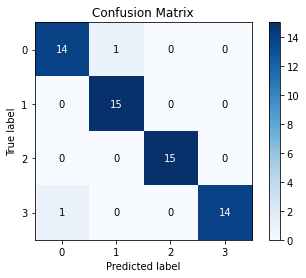

In [11]:
plot_confusion_matrix(y, finalPreds[0][0], normalize=False)

In [ ]:
#otra forma de determinar la prediccion final es con el promedio de las respuestas de cada modelo, ya que las respuestas
#de los modelos son probabilidades 

In [17]:
prediccionesCompletas = []
for i in bestModels:
    preds = i.predict(x)
    prediccionesCompletas.append(preds)
prediccionesCompletas = np.array(prediccionesCompletas)
prediccionesCompletas.shape

(16, 60, 4)

In [24]:
prediccionesCompletas[:,59,:]

array([[1.3048367e-07, 9.9940574e-01, 5.8896985e-04, 5.1217921e-06],
       [1.5423922e-01, 1.3508799e-03, 8.4440994e-01, 2.9804688e-08],
       [2.7463321e-02, 1.9574946e-08, 9.7248536e-01, 5.1354593e-05],
       [2.3569016e-01, 7.6312417e-01, 3.7697429e-04, 8.0866012e-04],
       [1.0425901e-03, 9.9673307e-01, 2.2232232e-03, 1.1007667e-06],
       [2.8913742e-02, 9.3104362e-01, 3.9393712e-02, 6.4893474e-04],
       [1.7137823e-01, 8.2637143e-01, 2.2167198e-03, 3.3588567e-05],
       [5.3356234e-03, 9.8167658e-01, 1.2985879e-02, 1.8875861e-06],
       [4.7406968e-02, 4.5488885e-01, 4.9380285e-01, 3.9014432e-03],
       [1.4243436e-01, 6.5102816e-02, 7.9242593e-01, 3.6942532e-05],
       [1.1740579e-02, 9.5569110e-01, 3.2220442e-02, 3.4796540e-04],
       [4.2977810e-02, 9.4529051e-01, 1.1646365e-02, 8.5303822e-05],
       [1.2780728e-02, 9.8363554e-01, 3.5097010e-03, 7.4138312e-05],
       [1.4862549e-01, 3.5467530e-03, 8.4764141e-01, 1.8628371e-04],
       [2.0477016e-02, 4.6774748e-

In [ ]:
#se toman las predicciones completas sin tomar el valor maximo, por eso el shape es de 6 predicciones por 60 muestras
#por 4 prtedicciones por modelo

In [18]:
prediccionesPromedio = (np.sum(prediccionesCompletas,axis=0)/16)
prediccionFinal =prediccionesPromedio.argmax(axis=1)

In [ ]:
#sacamos el promedio de cada prediccion y luego sacamos el mayor

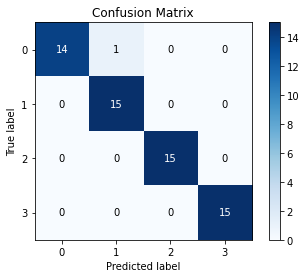

In [19]:
plot_confusion_matrix(y, prediccionFinal, normalize=False)

In [ ]:
#al final obtenemos el mismo resultado

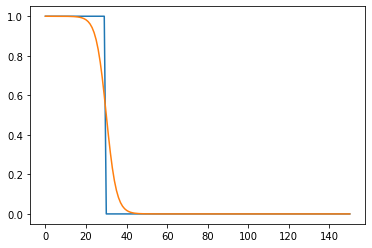

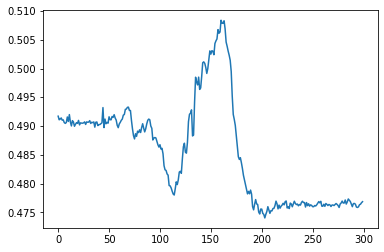

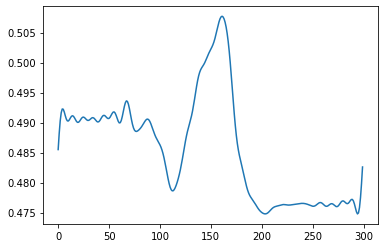

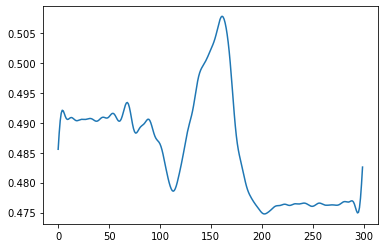

In [57]:
m=np.fft.rfft(x[0,:,:],axis=0)
ones=np.ones(30)
zeros=np.zeros(m.shape[0]-30)
c=np.concatenate((ones,zeros))
e = np.linspace(12, -48, m.shape[0])
e = 1/(1 + np.exp(-e))
clean=m*c.reshape(m.shape[0],1)
clean2 = m*e.reshape(m.shape[0],1)
m=np.fft.irfft(clean,axis=0)
m2=np.fft.irfft(clean2,axis=0)

plt.plot(c)
plt.plot(e)
plt.show()
plt.plot(x[0,:,1])
plt.show()
plt.plot(m[:,1])
plt.show()
plt.plot(m2[:,1])
plt.show()